<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,92.663551,80.832849,24.361493,96.644199,118.860527,423.362618,347.824737,75.537881
1,0.0,1.0,21.111572,89.093729,95.568251,50.007032,-264.649777,1.130807,202.926498,-201.795691
2,0.0,2.0,20.113321,20.389374,28.563748,44.980029,-0.297205,123.749266,104.786566,18.962700
3,0.0,3.0,54.983859,35.880897,78.132775,53.627280,179.079779,411.704591,229.087201,182.617390
4,0.0,4.0,27.453412,89.325381,80.951102,62.529083,-159.516801,110.742177,222.326151,-111.583974
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.321423,84.783647,53.077079,86.952303,-11.348311,295.786141,304.062294,-8.276153
249996,999.0,246.0,29.639762,80.152308,47.916227,62.041700,156.427597,386.177593,237.075363,149.102230
249997,999.0,247.0,66.731362,50.471567,36.189590,84.056999,17.356788,264.806306,235.429344,29.376962
249998,999.0,248.0,20.034740,98.357129,43.803139,94.025097,-517.735861,-251.515757,251.184124,-502.699881


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    92.663551  80.832849  24.361493  96.644199  118.860527   
      1.0    21.111572  89.093729  95.568251  50.007032 -264.649777   
      2.0    20.113321  20.389374  28.563748  44.980029   -0.297205   
      3.0    54.983859  35.880897  78.132775  53.627280  179.079779   
      4.0    27.453412  89.325381  80.951102  62.529083 -159.516801   
...                ...        ...        ...        ...         ...   
999.0 245.0  72.321423  84.783647  53.077079  86.952303  -11.348311   
      246.0  29.639762  80.152308  47.916227  62.041700  156.427597   
      247.0  66.731362  50.471567  36.189590  84.056999   17.356788   
      248.0  20.034740  98.357129  43.803139  94.025097 -517.735861   
      249.0  71.504713  22.407163  76.700336  88.888092   -5.032686   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    423.362618  347.824737   75.537881  
      1.0      1.130807  202.926498 -201.795691  
      2.0    123.749266  104.786566   18.962700  
      3.0    411.704591  229.087201  182.617390  
      4.0    110.742177  222.326151 -111.583974  
...                 ...         ...         ...  
999.0 245.0  295.786141  304.062294   -8.276153  
      246.0  386.177593  237.075363  149.102230  
      247.0  264.806306  235.429344   29.376962  
      248.0 -251.515757  251.184124 -502.699881  
      249.0  264.467618  239.097383   25.370235  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    92.663551  80.832849  24.361493  96.644199  118.860527   
      1.0    21.111572  89.093729  95.568251  50.007032 -264.649777   
      2.0    20.113321  20.389374  28.563748  44.980029   -0.297205   
      3.0    54.983859  35.880897  78.132775  53.627280  179.079779   
      4.0    27.453412  89.325381  80.951102  62.529083 -159.516801   
...                ...        ...        ...        ...         ...   
999.0 245.0  72.321423  84.783647  53.077079  86.952303  -11.348311   
      246.0  29.639762  80.152308  47.916227  62.041700  156.427597   
      247.0  66.731362  50.471567  36.189590  84.056999   17.356788   
      248.0  20.034740  98.357129  43.803139  94.025097 -517.735861   
      249.0  71.504713  22.407163  76.700336  88.888092   -5.032686   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    423.362618  347.824737   75.537881  
      1.0      1.130807  202.926498 -201.795691  
      2.0    123.749266  104.786566   18.962700  
      3.0    411.704591  229.087201  182.617390  
      4.0    110.742177  222.326151 -111.583974  
...                 ...         ...         ...  
999.0 245.0  295.786141  304.062294   -8.276153  
      246.0  386.177593  237.075363  149.102230  
      247.0  264.806306  235.429344   29.376962  
      248.0 -251.515757  251.184124 -502.699881  
      249.0  264.467618  239.097383   25.370235  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,92.663551,80.832849,24.361493,96.644199,118.860527,423.362618,347.824737,75.537881
1,0.0,1.0,21.111572,89.093729,95.568251,50.007032,-264.649777,1.130807,202.926498,-201.795691
2,0.0,2.0,20.113321,20.389374,28.563748,44.980029,-0.297205,123.749266,104.786566,18.962700
3,0.0,3.0,54.983859,35.880897,78.132775,53.627280,179.079779,411.704591,229.087201,182.617390
4,0.0,4.0,27.453412,89.325381,80.951102,62.529083,-159.516801,110.742177,222.326151,-111.583974
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.321423,84.783647,53.077079,86.952303,-11.348311,295.786141,304.062294,-8.276153
249996,999.0,246.0,29.639762,80.152308,47.916227,62.041700,156.427597,386.177593,237.075363,149.102230
249997,999.0,247.0,66.731362,50.471567,36.189590,84.056999,17.356788,264.806306,235.429344,29.376962
249998,999.0,248.0,20.034740,98.357129,43.803139,94.025097,-517.735861,-251.515757,251.184124,-502.699881


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    92.663551  80.832849  24.361493  96.644199  118.860527   
      1.0    21.111572  89.093729  95.568251  50.007032 -264.649777   
      2.0    20.113321  20.389374  28.563748  44.980029   -0.297205   
      3.0    54.983859  35.880897  78.132775  53.627280  179.079779   
      4.0    27.453412  89.325381  80.951102  62.529083 -159.516801   
...                ...        ...        ...        ...         ...   
999.0 245.0  72.321423  84.783647  53.077079  86.952303  -11.348311   
      246.0  29.639762  80.152308  47.916227  62.041700  156.427597   
      247.0  66.731362  50.471567  36.189590  84.056999   17.356788   
      248.0  20.034740  98.357129  43.803139  94.025097 -517.735861   
      249.0  71.504713  22.407163  76.700336  88.888092   -5.032686   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    423.362618  347.824737   75.537881  
      1.0      1.130807  202.926498 -201.795691  
      2.0    123.749266  104.786566   18.962700  
      3.0    411.704591  229.087201  182.617390  
      4.0    110.742177  222.326151 -111.583974  
...                 ...         ...         ...  
999.0 245.0  295.786141  304.062294   -8.276153  
      246.0  386.177593  237.075363  149.102230  
      247.0  264.806306  235.429344   29.376962  
      248.0 -251.515757  251.184124 -502.699881  
      249.0  264.467618  239.097383   25.370235  

[250000 rows x 8 columns]

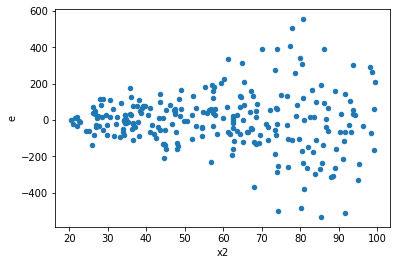

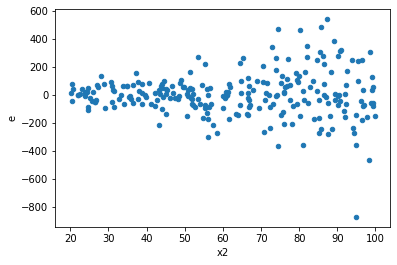

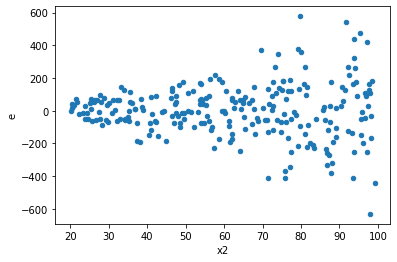

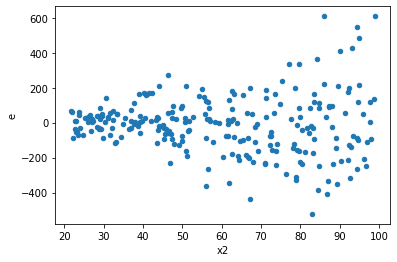

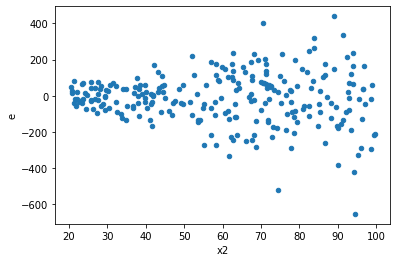

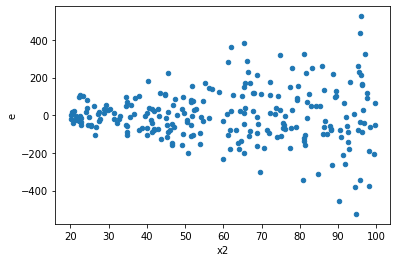

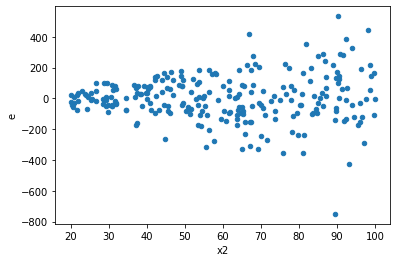

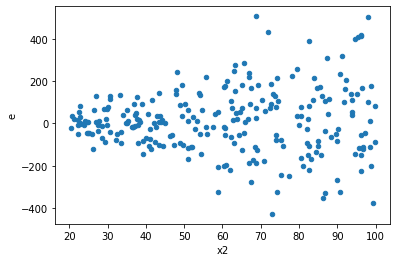

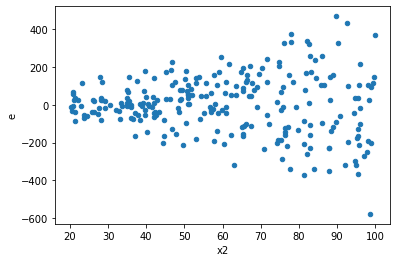

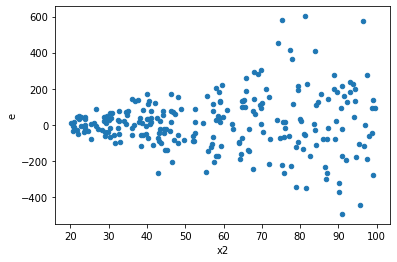

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,119.0,127.0,2582509.9989828714,3376189.841274866,21701.764697335053,26584.17197854225,1.2249774315268818,0.2607539875049525,0.8696230062475238,0.13037699375247624,Reject001=1 : Homoscedasticity
1.0,128.0,118.0,1735172.8455624308,4518457.077126601,13556.03785595649,38292.00912819153,2.8247198432959606,2.3900691203948554e-08,0.9999999880496544,1.1950345601974277e-08,Reject001=0 : Heteroscedasticity
2.0,138.0,108.0,2562647.997625149,4200793.114010525,18569.913026269194,38896.23253713449,2.094583452389436,7.756747319520585e-05,0.9999612162634024,3.8783736597602925e-05,Reject001=0 : Heteroscedasticity
3.0,136.0,110.0,2784273.634621482,3873580.083224429,20472.60025456972,35214.364392949356,1.720072875700736,0.003358461276450342,0.9983207693617748,0.001679230638225171,Reject001=0 : Heteroscedasticity
7.0,107.0,139.0,1474776.9183463694,4174231.3127056537,13782.961853704386,30030.441098601827,2.178808982956786,1.710348011951801e-05,0.9999914482599402,8.551740059759005e-06,Reject001=0 : Heteroscedasticity
8.0,134.0,112.0,2624501.9582480495,3387938.0672857407,19585.8355093138,30249.44702933697,1.5444552781499783,0.01798194770014616,0.9910090261499269,0.00899097385007308,Reject001=1 : Homoscedasticity
11.0,131.0,115.0,2634817.4424472544,2504949.5358712687,20113.110247688965,21782.169877141467,1.0829836663200452,0.6629277662477899,0.668536116876105,0.33146388312389496,Reject001=1 : Homoscedasticity
12.0,112.0,134.0,1537675.8730716114,3699234.4334758306,13729.248866710815,27606.227115491274,2.010760194057509,0.00011492295861370572,0.9999425385206931,5.746147930685286e-05,Reject001=0 : Heteroscedasticity
13.0,135.0,111.0,2350925.9695912777,4311389.292145446,17414.266441416872,38841.344974283296,2.2304324505972737,1.6962005024323545e-05,0.9999915189974878,8.481002512161773e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,119.0,127.0,2582509.9989828714,3376189.841274866,21701.764697335053,26584.17197854225,1.2249774315268818,0.2607539875049525,Reject001=1 : Homoscedasticity
1.0,128.0,118.0,1735172.8455624308,4518457.077126601,13556.03785595649,38292.00912819153,2.8247198432959606,2.3900691203948554e-08,Reject001=0 : Heteroscedasticity
2.0,138.0,108.0,2562647.997625149,4200793.114010525,18569.913026269194,38896.23253713449,2.094583452389436,7.756747319520585e-05,Reject001=0 : Heteroscedasticity
3.0,136.0,110.0,2784273.634621482,3873580.083224429,20472.60025456972,35214.364392949356,1.720072875700736,0.003358461276450342,Reject001=0 : Heteroscedasticity
4.0,110.0,136.0,2445842.2284124745,2722372.9400925157,22234.929349204314,20017.448088915557,0.9002703707548272,0.5683064478037999,Reject001=1 : Homoscedasticity
5.0,138.0,108.0,3582269.0603335993,1504303.8190136333,25958.47145169275,13928.73906494105,0.5365777831280107,0.0005759179971308528,Reject001=0 : Heteroscedasticity
6.0,131.0,115.0,4321782.587347941,1441612.6924449417,32990.7067736484,12535.762542999493,0.3799785990948377,1.1471580741288736e-07,Reject001=0 : Heteroscedasticity
7.0,107.0,139.0,1474776.9183463694,4174231.3127056537,13782.961853704386,30030.441098601827,2.178808982956786,1.710348011951801e-05,Reject001=0 : Heteroscedasticity
8.0,134.0,112.0,2624501.9582480495,3387938.0672857407,19585.8355093138,30249.44702933697,1.5444552781499783,0.01798194770014616,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    631
Reject001=1 : Homoscedasticity      369
Name: Result_test, dtype: int64